In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 383s 2us/step


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),        # Flatten input images (32x32x3) to 1D vector
    Dense(512, activation='relu'),           # Hidden layer with 512 neurons
    Dense(256, activation='relu'),           # Hidden layer with 256 neurons
    Dense(10, activation='softmax')          # Output layer for 10 classes
])

E:\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',                        # Adam optimizer
              loss='sparse_categorical_crossentropy',  # Suitable loss for classification
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.2762 - loss: 2.0187 - val_accuracy: 0.3883 - val_loss: 1.7152
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3953 - loss: 1.6920 - val_accuracy: 0.4360 - val_loss: 1.5787
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4249 - loss: 1.5998 - val_accuracy: 0.4367 - val_loss: 1.5750
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4461 - loss: 1.5501 - val_accuracy: 0.4567 - val_loss: 1.5395
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4584 - loss: 1.5071 - val_accuracy: 0.4411 - val_loss: 1.5556
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4718 - loss: 1.4762 - val_accuracy: 0.4600 - val_loss: 1.5069
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4841 - loss: 1.4401 - val_accuracy: 0.4577 - val_loss: 1.5132
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4912 -

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4838 - loss: 1.4483
Test accuracy: 0.4818


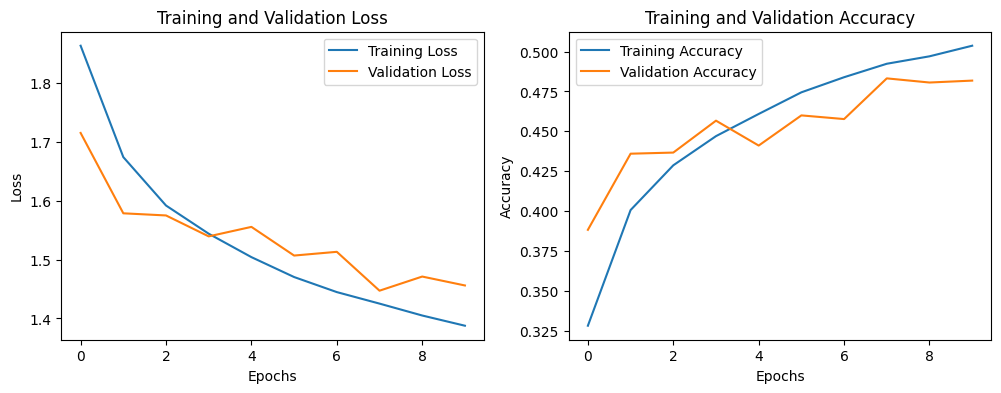

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()